<a href="https://colab.research.google.com/github/AImetricsIO/udemy_advances_ta_ml/blob/main/Hybrid_Indicator_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

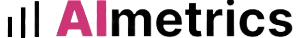
-------------------------------------------------------------------------------

---

**(C) [AImetrics.IO](https://aimetrics.io/) as a brand of Noesis AF · 2024** Please contact us at aimetricsio at gmail.com

---

📘 This notebook is explained in this course at Udemy:
Technical Analysis Advances with Machine Learning 📘

🔗 [Enroll Now](https://www.udemy.com/course/technical-analysis-advances-with-machine-learning/?referralCode=54704DE95A4891419042)

---
# Hybrid Indicators

This notebook's **goal** is to introduce the concept of **Hybrid Indicators**. The idea is to employ an unsupervised Machine Learning algorithm, PCA (Principal Component Analysis), to reduce dimensionality. Specifically, we start with the SMAs of 7, 14, 21, and 50 (4 dimensions) and reduce them to a single dimension, the SMAHybrid.

## Interpretation of the Hybrid SMA

**Variance Capture:** For an SMA, the PC1 will be more aligned with short-term SMAs due to their higher variability. This is similar to the principle of the EMA (Exponential Moving Average), which gives more weight to recent data.

**No Assumptions:** Unlike the EMA, PCA does not assume a specific period. It analyzes the data and automatically determines the combinations that capture the most variance.

- **Not Universally Optimal**: This hybrid SMA is not necessarily the best for all applications. It simply captures more variance.
- **Machine Learning Models**: Ideal for these models due to its ability to capture variability.
- **Strategies**: Its effectiveness will depend on the specific system and the objectives of the analysis.

---
Data from eodhd.com: We will use data for McDonald's with a demo token. The data is updated daily. For other companies, please request your own token at [eodhd.com](https://eodhd.com).

---
This notebook does not offer any buy or sell signals; it only tests models for educational purposes.

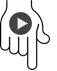


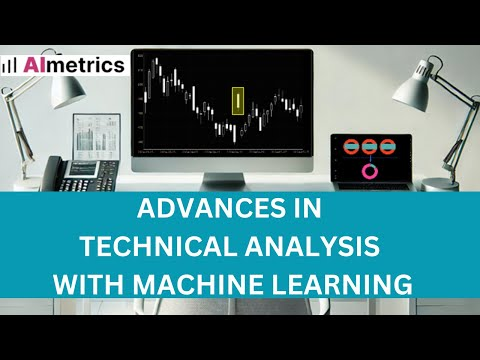

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('2jS89tLieYk', start=83)

# **Python starts as an empty engine, it requires libraries, and we will only import the ones we need for this notebook's tasks. Three types of libraries:**

1.   External default libraries (they don't expire)
2.   AImetrics' libraries (until session expires)
3.   External non default (until session expires)
4.   Besides, we will use price data files in our public GitHub Repo
https://github.com/AImetricsIO/udemy_advances_ta_ml

---

To ensure that the code remains readable and efficient, we load the functions from our library`edabasic.py` and `udemy.py` located in our GitHub repository. You can view the functions at these URLs:
* [https://raw.githubusercontent.com/AImetricsIO/eda/main/edabasic.py](https://raw.githubusercontent.com/AImetricsIO/eda/main/edabasic.py)
* [https://raw.githubusercontent.com/AImetricsIO/udemy_advances_ta_ml/main/udemy.py](https://raw.githubusercontent.com/AImetricsIO/udemy_advances_ta_ml/main/udemy.py).

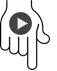



In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 1

# 1. Default libraries already installed in Google Colab
import os, subprocess, sys
import pandas as pd # handle tabular data (to understand it, it's like the pythons excel)
import ipywidgets as widgets # Visualization
from IPython.display import clear_output, display # Visualization

# 2. AImetrics libraries: We import the urls with the functions
!curl -O https://raw.githubusercontent.com/AImetricsIO/eda/main/edabasic.py
!curl -O https://raw.githubusercontent.com/AImetricsIO/udemy_advances_ta_ml/main/udemy.py

import edabasic
import udemy
print(f"Successfully installed edabasic and udemy")

# 3. External Libraries that we need but they are not by default in Google Colab
udemy.install_and_import('pandas_ta')
import pandas_ta as ta

# 4. We need to install or update the repository in Google Colab environment to access all the files from AImetrics github
udemy.cloning_repo()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1161  100  1161    0     0   6349      0 --:--:-- --:--:-- --:--:--  6344
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3011  100  3011    0     0  17324      0 --:--:-- --:--:-- --:--:-- 17404
pandas_ta is already installed.
Repository cloning updated successfully in Google Colab environment to /content/udemy_advances_ta_ml


# **Let's recover Apple's data**

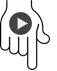

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 2
code = 'MCD.US'
name = 'McDonald`s Corp'

from datetime import datetime, timedelta
import requests, json, locale
import pandas as pd
import numpy as np

date_today = datetime.now().strftime("%Y-%m-%d")
date_from = (datetime.now() - timedelta(days=3*365)).strftime("%Y-%m-%d")

# eodhd's url to retrieve data via api
eod_token = 'demo'
url = f"https://eodhistoricaldata.com/api/eod/{code}?interval=d&api_token={eod_token}&from={date_from}&to={date_today}&fmt=json"

# Get data
resp = requests.get(url)

# Is it ok?
if resp.status_code != 200:
    print(f"No se pudo obtener datos para {code}: {name}. Código de estado: {resp.status_code}")

# Transform to json format
json_data = resp.json()

# Json to dataframe
dfday = pd.DataFrame(json_data)

# Be careful! We adjust with adjusted_close
dfday = edabasic.adjust_close(dfday)

# Ajustes del df
dfday['timestamp'] = pd.to_datetime(dfday['date']).astype(np.int64) // 10**9
dfday['gmtoffset'] = 0
dfday['datetime'] = pd.to_datetime(dfday['date']) # Colocar la columna 'date' como índice basado en datetime
dfday.set_index('datetime', inplace=True)
dfday.drop(columns=['date'], inplace=True) # Eliminar columna 'date'

# Reorder columns
dfday = dfday[['timestamp', 'gmtoffset', 'open', 'high', 'low', 'close', 'volume']]

print(f'Recovered data from: {name} ')
dfday.tail(3)

Recovered data from: McDonald`s Corp 


,timestamp,gmtoffset,open,high,low,close,volume
datetime,,,,,,,
2024-07-09,1720483200,0,247.23,247.40,243.53,245.82,4927300.0
2024-07-10,1720569600,0,247.00,250.56,245.90,250.49,4092700.0
2024-07-11,1720656000,0,251.22,255.65,249.87,254.80,5479943.0


# **FEATURE ENGINEERING**

*   RSI with ta library
*   SMA directly calculated
*   You can add any others, ask your instructor at the course.
---

There's a document in the course explaining why we must transform price based indicators into absolute ones. In this case, SMA must be transformed to percentual distance.

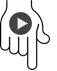



In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 3

# FEATURE ENGINEERING
dfday['RSI7'] = (ta.momentum.rsi(close=dfday['close'], window=7)).round(2)
dfday['RSI14'] = (ta.momentum.rsi(close=dfday['close'], window=14)).round(2)
dfday['RSI21'] = (ta.momentum.rsi(close=dfday['close'], window=21)).round(2)

SMA7  = dfday["close"].rolling(window=7, min_periods=7).mean()
SMA14 = dfday["close"].rolling(window=14, min_periods=14).mean()
SMA21 = dfday["close"].rolling(window=21, min_periods=21).mean()
SMA50 = dfday["close"].rolling(window=50, min_periods=50).mean()
dfday["SMAprc_7"] = (((dfday["close"] - SMA7) / SMA7) * 100).round(2)
dfday["SMAprc_14"] = (((dfday["close"] - SMA14) / SMA14) * 100).round(2)
dfday["SMAprc_21"] = (((dfday["close"] - SMA21) / SMA21) * 100).round(2)
dfday["SMAprc_50"] = (((dfday["close"] - SMA50) / SMA50) * 100).round(2)

# Delete NaN rows (nans arises due to non existent data in SMA before a period is full)
dfday.dropna(inplace=True)
dfday.reset_index(drop=True, inplace=True)
dfday.tail(3)

,timestamp,gmtoffset,open,high,low,close,volume,RSI7,RSI14,RSI21,SMAprc_7,SMAprc_14,SMAprc_21,SMAprc_50
702,1720483200,0,247.23,247.40,243.53,245.82,4927300.0,34.87,34.87,34.87,-1.52,-2.92,-3.05,-5.47
703,1720569600,0,247.00,250.56,245.90,250.49,4092700.0,43.73,43.73,43.73,0.60,-1.07,-1.10,-3.52
704,1720656000,0,251.22,255.65,249.87,254.80,5479943.0,50.44,50.44,50.44,2.05,0.60,0.58,-1.73


# **UNSUPERVISED LEARNING - DIMENSIONALITY REDUCTION WITH A Principal Component Analysis (PCA)**

---

*   Select the features for hybridization.
*   Normalize the data.
*   Apply PCA using sklearn library.
*   Get the explained_variance

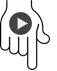

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 4

# sklearn widely used library in machine learning (no need to install, it's by default in Google Colab)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select columns for PCA
indicators_to_hybridize = ['SMAprc_7', 'SMAprc_14', 'SMAprc_21', 'SMAprc_50']
x = dfday[indicators_to_hybridize]

# Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA()
pca.fit(x_scaled)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative variance for 1, 2, 3, and 4 components
cumulative_variance = explained_variance.cumsum()

# Print the results
for i in range(len(cumulative_variance)):
    print(f"If we hybrid into {i+1} component(s), the remaining variance is: {cumulative_variance[i]*100:.2f}%")

If we hybrid into 1 component(s), the remaining variance is: 82.64%
If we hybrid into 2 component(s), the remaining variance is: 96.01%
If we hybrid into 3 component(s), the remaining variance is: 99.52%
If we hybrid into 4 component(s), the remaining variance is: 100.00%


# **A PCA, NOW WITH A SINGLE INDICATOR**

---

Just the same, but selecting one component `pca = PCA(n_components=1)`

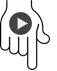

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 5

# Selecting moving average columns
indicators_to_hybridize = ['SMAprc_7', 'SMAprc_14', 'SMAprc_21', 'SMAprc_50']
x = dfday[indicators_to_hybridize]

# Data normalization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 1 component PCA
pca = PCA(n_components=1)
principal_component = pca.fit_transform(x_scaled)

# If we want to maintain interpretability, we need to invert the PCA transformation to retrieve values in the original scale
inverse_transformed = pca.inverse_transform(principal_component)

# De-normalizing the data to obtain values comparable to the original moving averages
SMAprc_hybrid = scaler.inverse_transform(inverse_transformed)[:, 0]

# Adding the hybrid column to the DataFrame
dfday['SMAprc_hybrid'] = SMAprc_hybrid
dfday.tail(3)



,timestamp,gmtoffset,open,high,low,close,volume,RSI7,RSI14,RSI21,SMAprc_7,SMAprc_14,SMAprc_21,SMAprc_50,SMAprc_hybrid
702,1720483200,0,247.23,247.40,243.53,245.82,4927300.0,34.87,34.87,34.87,-1.52,-2.92,-3.05,-5.47,-1.711611
703,1720569600,0,247.00,250.56,245.90,250.49,4092700.0,43.73,43.73,43.73,0.60,-1.07,-1.10,-3.52,-0.509476
704,1720656000,0,251.22,255.65,249.87,254.80,5479943.0,50.44,50.44,50.44,2.05,0.60,0.58,-1.73,0.462986


# **SMA back to original form**

---

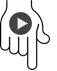


In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 6

# To ensure we start here and can repeat this cell
dfn = dfday.copy()

# Trnasform SMAhybrid to price
dfn['SMA7'] = dfn['close'] * (1 - dfn['SMAprc_7'] * 0.01)
dfn['SMA14'] = dfn['close'] * (1 - dfn['SMAprc_14'] * 0.01)
dfn['SMA21'] = dfn['close'] * (1 - dfn['SMAprc_21'] * 0.01)
dfn['SMA50'] = dfn['close'] * (1 - dfn['SMAprc_50'] * 0.01)
dfn['SMAhybrid'] = dfn['close'] * (1 - dfn['SMAprc_hybrid'] * 0.01)

# Delete unnecesary columns
dfn.drop(columns=['SMAprc_7', 'SMAprc_14','SMAprc_21','SMAprc_50','SMAprc_hybrid'], inplace=True)

# Round columns 'Open', 'High', 'Low' y 'Close' to 3 decs (more may have arisen due to price adjustment 'adjusted_close')
dfn[['SMA7', 'SMA14', 'SMA21', 'SMA50','SMAhybrid']] = dfn[['SMA7', 'SMA14', 'SMA21', 'SMA50','SMAhybrid']].round(3)

dfn.tail(3)

,timestamp,gmtoffset,open,high,low,close,volume,RSI7,RSI14,RSI21,SMA7,SMA14,SMA21,SMA50,SMAhybrid
702,1720483200,0,247.23,247.40,243.53,245.82,4927300.0,34.87,34.87,34.87,249.556,252.998,253.318,259.266,250.027
703,1720569600,0,247.00,250.56,245.90,250.49,4092700.0,43.73,43.73,43.73,248.987,253.170,253.245,259.307,251.766
704,1720656000,0,251.22,255.65,249.87,254.80,5479943.0,50.44,50.44,50.44,249.577,253.271,253.322,259.208,253.620


# **PLOT the SMA**

---

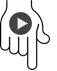

mplfinance is already installed.


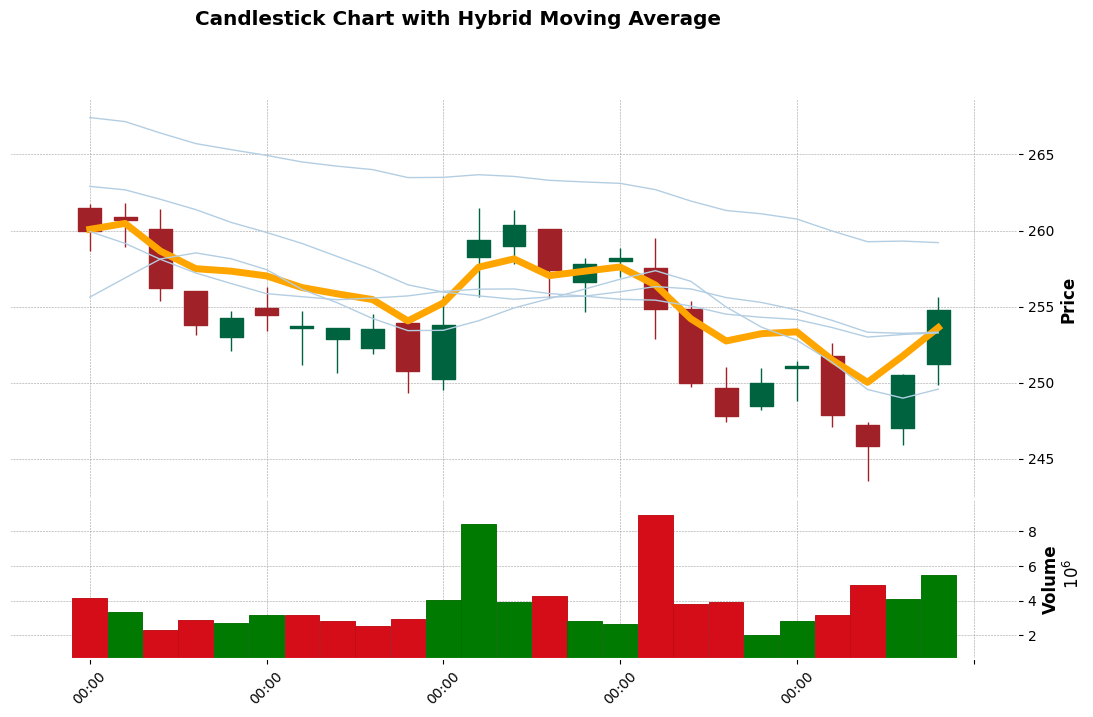

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 7

udemy.install_and_import('mplfinance')
import mplfinance as mpf

# Adjusting the figure size manually
figsize = (14, 8)  # Width and height of the figure in inches

# Number of days to plos
days2plot = 25

# Convert the 'datetime' column to datetime and set as index
df_subset = dfn.iloc[-days2plot:].copy()

df_subset['timestamp'] = pd.to_datetime(df_subset['timestamp'])
df_subset.set_index('timestamp', inplace=True)

# Ensure the index is of type DatetimeIndex
assert isinstance(df_subset.index, pd.DatetimeIndex), "DataFrame index is not of type DatetimeIndex"

# Create candlestick chart using mplfinance
ap0 = [mpf.make_addplot(df_subset['SMAhybrid'], color='orange', width=5.0, panel=0, secondary_y=False),
       mpf.make_addplot(df_subset['SMA7'], color='#B3CEE2', width=1.0, panel=0, secondary_y=False),
       mpf.make_addplot(df_subset['SMA14'], color='#B3CEE2', width=1.0, panel=0, secondary_y=False),
       mpf.make_addplot(df_subset['SMA21'], color='#B3CEE2', width=1.0, panel=0, secondary_y=False),
       mpf.make_addplot(df_subset['SMA50'], color='#B3CEE2', width=1.0, panel=0, secondary_y=False)
       ]
mpf.plot(df_subset, type='candle', volume=True, addplot=ap0, style='charles', title='Candlestick Chart with Hybrid Moving Average', ylabel='Price', ylabel_lower='Volume', figsize=figsize)


# **(OPTIONAL) DOWNLOAD TO LOCAL COMPUTER**

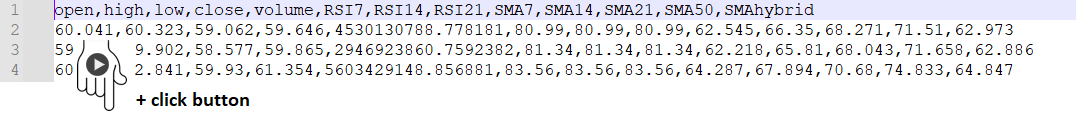
---

Press the button to get a csv formated file

In [ ]:
# <<-- PRESS PLAY TO RUN SECTION 8

display(udemy.create_download_link(df_subset, 'hybrid_indicator.csv', title="Press to Download CSV at your local computer"))